# Predicting Number of Rings on Abalones

## Phase 2: Statistical Modeling

### Group Name: Project Group 80
### Group Members: Anthony Limanto (s3898395)


## Table of Contents
* [Introduction](#Introduction)
* [Statistical Modelling](#Statistical_Modelling)
* [Critique & Limitations](#Critique_&_Limitations)
* [Summary & Conclusions](#Summary_&_Conclusions)


## Introduction

### Phase 1 Summary
Our goal in phase 1 was to find a way to predict the number of rings on an abalone through the other physical characteristics of it. Being able to predict the number of rings on an abalone would allow us to obtain its age, which is beneficial in determining its economical value.

Our first step in phase one was cleaning the dataset, this was a relatively quick process since the dataset was already clean (no missing values, eg) expect for 2 observations with an impossible weight of 0, which we removed since it wouldn't significantly impact the dataset.

Our second step was to visualize and explore the data through graphs which we made through seaborn and matplotlib. The graphs showed that there was a positive correlation between the number of rings on an abalone and its height, weight, diameter, essentially the larger abalones were more likely to have more rings.

### Report Overview
This report contains a brief description of the methodology used to predict the number of rings on an abalone. Then we perform statistical modeling and create a full model of our data. To check for any violations of the assumptions of multiple regression we perform some diagnostic checks. Later to try and improve our model we do backwards feature selection to only use the independent variables that are significant. We also perform some diagnostic checks on our reduced model. At the end of the report we will summarise phase 1 and phase 2 of our project. Also we summarise our findings and come to a conclusion of if we achieved our goals and objectives that we laid out in phase 1.

### Overview of Methodology

In this report we are going to use multiple linear regression to predict the dependent value (Number of Rings) from multiple independent values. This method is an extension of linear regression which uses one independent value to predict the dependent value. It attempts to use a straight line to establish a relationship between the two values. Multiple linear regression is similar but more than one value is used to determine the dependent value.

There are various assumption that multiple linear regression is based on, such as the observations are independent and that there is a linear relationship between the variables, constant variance of the errors and the independent variables are not highly correlated with each other. 

## Statistical Modeling

### Full Model Overview
Here is an overview of our model, this includes all of the variables that we are using.

| Name | DataType | Units | Description |
| --- | --- | --- | --- |
| Gender | Categorical Nominal | NA | Sex of an abalone, Male, Female, also includes  I for infant |
| Length | Numeric Continuous | mm | The longest measurement of an abalone's shell |
| Diameter | Numeric Continuous | mm | Perpendicular to its length |
| Height | Numeric Continuous | mm | Height of an abalone with meat in its shell |
| Whole Weight | Numeric Continuous | grams | Total weight of a whole abalone |
| Shucked Weight | Numeric Continuous | grams | Weight of an abalone's meat |
| Viscera Weight | Numeric Continuous | grams | Gut Weight after bleeding |
| Shell Weight | Numeric Continuous | grams | Weight of its shell after being dried |
| Rings | Numeric Integer | NA | Gives the age of an abalone +1.5 years |

In [1]:
# Importing modules
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings
# Obatining the dataset through using this url

df = pd.read_csv('https://raw.githubusercontent.com/vaksakalli/datasets/master/abolone.csv')


df.head()

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Model Fitting

We're going to make the string for the formula down here. We also just need to replace the whitespace in column names with an underscore so it works when making our model.

In [2]:
df.columns = [colname.replace(' ', '_') for colname in list(df.columns)]

indep_vars = ' + '.join(df.drop(columns='Rings').columns)
formula_string = 'Rings ~ ' + indep_vars
print('formula_string: ', formula_string)

df.columns = [colname.replace(' ', '_') for colname in list(df.columns)]

formula_string:  Rings ~ Gender + Length + Diameter + Height + Whole_weight + Shucked_weight + Viscera_weight + Shell_weight


We have one categorical variable, so we are going to perform one-hot-encoding on the dataset. But first we need to change its type to categorical.

In [3]:
df["Gender"] = df["Gender"].astype(pd.CategoricalDtype(categories=["F",'I',"M"]))
df['Gender'].dtype

CategoricalDtype(categories=['F', 'I', 'M'], ordered=False)

In [4]:

data_encoded = pd.get_dummies(df)
data_encoded.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Gender_F,Gender_I,Gender_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [5]:
indep_vars_encoded = ' + '.join(data_encoded.drop(columns='Rings').columns)
formula_string_encoded = 'Rings ~ ' + indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  Rings ~ Length + Diameter + Height + Whole_weight + Shucked_weight + Viscera_weight + Shell_weight + Gender_F + Gender_I + Gender_M


In [6]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     538.9
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:21:10   Log-Likelihood:                -9204.1
No. Observations:                4177   AIC:                         1.843e+04
Df Residuals:                    4167   BIC:                         1.849e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.7292      0.207     13.

This model shows us that a majority of our variables are significant in predicting the dependent value (Number of Rings), we can see this through the given p-values in our model. However there is an variable that is insignificant at a 5% level.

Our model has an adjusted R-squared value of 0.537, meaning that around 53.7% of the variance can be explained by the model.

Another thing that this model shows us, is that there maybe strong multicollinearity problems, meaning that some independent variables are highly correlated with each other. This will be further discussed upon in the [Critique & Limitations](#Critique_&_Limitations) section.

### Full Model Diagnostic Checks¶
Here in this section we are going to check if there has been any violation of any assumptions of multiple regression.
They are as follows:
- A linear relationship between the dependent and independent variables
- The independent variables are not highly correlated with each other
- The variance of the residuals is constant
- Independence of observation

In [7]:
residuals_full = pd.DataFrame({'actual': data_encoded['Rings'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head()

,actual,predicted,residual
0,15,9.222306,5.777694
1,7,7.849257,-0.849257
2,9,11.095570,-2.095570
3,10,9.654205,0.345795
4,7,6.735447,0.264553


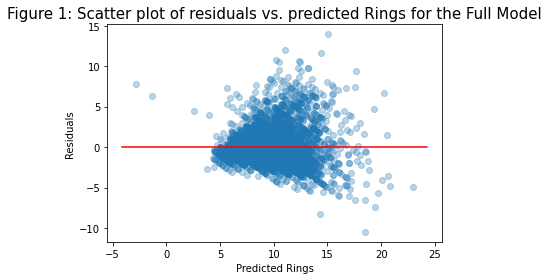

In [8]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)


plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.ylabel('Residuals');
plt.xlabel('Predicted Rings');
plt.title('Figure 1: Scatter plot of residuals vs. predicted Rings for the Full Model', fontsize=15);
plot_line(axis=plt.gca(), slope=0, intercept=0, c="red")
plt.show();

From Figure 1 we can see that there are a couple of outliers in our graph and that the error in the residuals are more extreme in the 15 - 20 rings range. This suggests that the constant variance in residuals assumption has been violated.

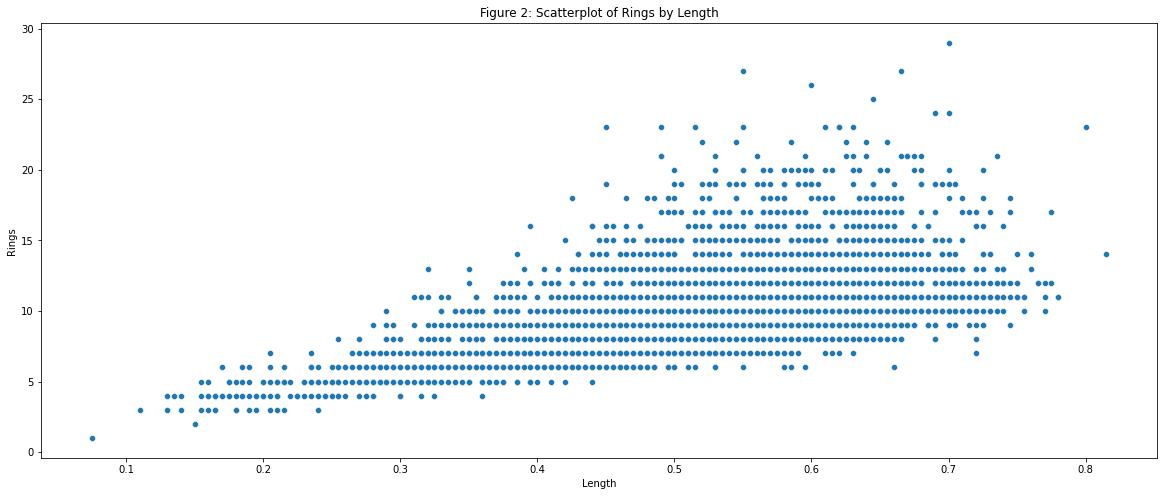

In [9]:
plt.figure(figsize = (20,8))

sns.scatterplot(df['Length'], df['Rings'])
plt.title('Figure 2: Scatterplot of Rings by Length');
plt.show();

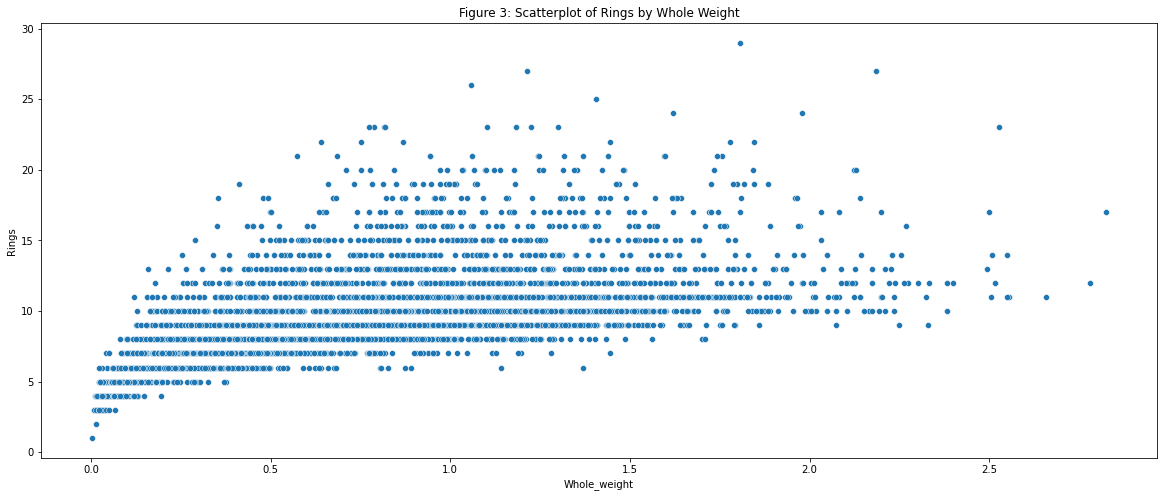

In [10]:
plt.figure(figsize = (20,8))

sns.scatterplot(df['Whole_weight'], df['Rings'])
plt.title('Figure 3: Scatterplot of Rings by Whole Weight');
plt.show();


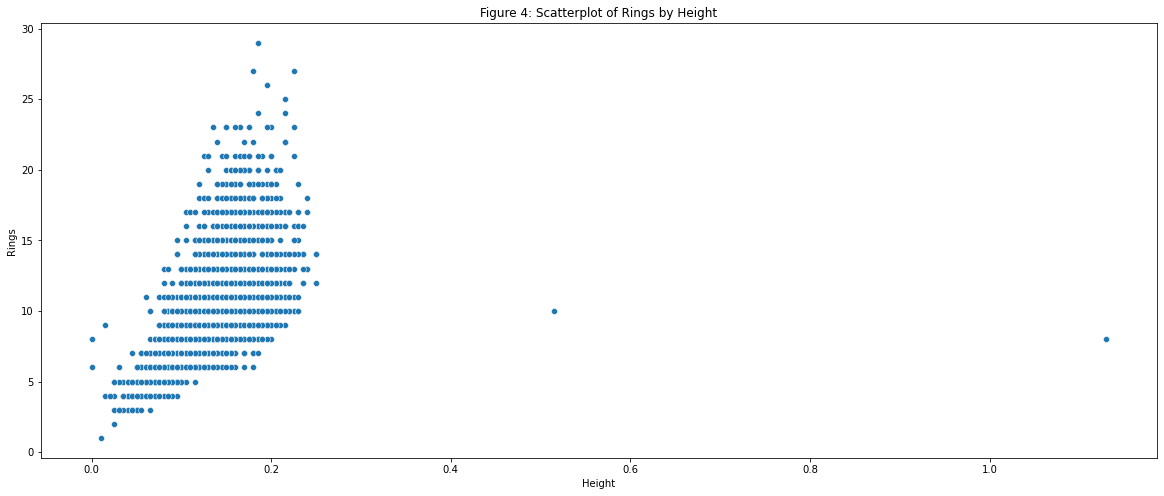

In [11]:
plt.figure(figsize = (20,8))

sns.scatterplot(df['Height'], df['Rings'])
plt.title('Figure 4: Scatterplot of Rings by Height');
plt.show();

In figures 2, 3 and 4 we can see that the assumption that there is an linear relationship between the independent and dependent variables has been violated, this is shown through how the graphs how the graphs start thin at the bottom, then expand, which suggests heteroscedasticity.

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = data_encoded.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_encoded.values, i) for i in range(len(data_encoded.columns))]
 
print(vif_data)

           feature         VIF
0           Length   40.946393
1         Diameter   42.631309
2           Height    3.623546
3     Whole_weight  113.801515
4   Shucked_weight   32.565946
5   Viscera_weight   17.725083
6     Shell_weight   21.571528
7            Rings    2.163961
8         Gender_F   24.067804
9         Gender_I   20.484972
10        Gender_M   26.941014


Here we can see through using variance inflation factor that our data shows multicollinearity, this violates the assumption that the independent variables are not highly correlated with each other. This makes sense as an abalone's length would affect its height, and diameter. As wells as its whole weight would have its other weights.

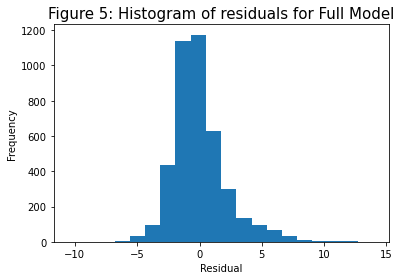

In [13]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 5: Histogram of residuals for Full Model', fontsize=15);
plt.show();

Figure 5 shows that the residuals are very slightly right-skewed and is somewhat symmetric, this shows that the assumption of normality hasn't been violated.

## Reduced Model Overview
Here is an overview of our reduced model, but first we need to do backwards feature selection to create our reduced model.

### Backwards Feature Selection
[Credit](https://github.com/vaksakalli/stats_tutorials/blob/master/Regression_Case_Study1_web.ipynb) for the code below.

In [14]:

## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=data_encoded).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = data_encoded).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "Length" with p-value 0.8

***
                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     606.4
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:21:11   Log-Likelihood:                -9204.2
No. Observations:                4177   AIC:                         1.843e+04
Df Residuals:                    4168   BIC:                         1.848e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

From the new reduced model we still have an R-squared value of 0.5379, meaning that 53.8% of the variance in the Rings can be explained our independent variables. As expected, after backwards feature selection all of our independent variables are significant. However as we still have the same issues as the full model as we will see in our diagnostic checks.

### Reduced Model Diagnostic Checks

In [15]:
residuals_reduced = pd.DataFrame({'actual': data_encoded['Rings'], 
                            'predicted': model_reduced_fitted.fittedvalues, 
                            'residual': model_reduced_fitted.resid})
residuals_reduced.head()

,actual,predicted,residual
0,15,9.216457,5.783543
1,7,7.848181,-0.848181
2,9,11.095069,-2.095069
3,10,9.640896,0.359104
4,7,6.729240,0.270760


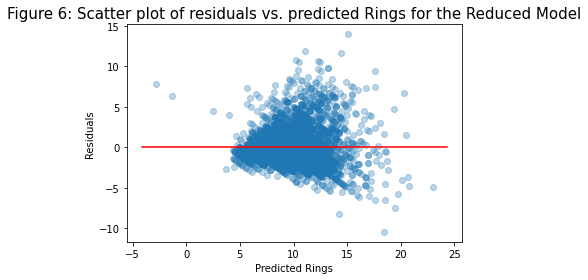

In [16]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)


plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.ylabel('Residuals');
plt.xlabel('Predicted Rings');
plt.title('Figure 6: Scatter plot of residuals vs. predicted Rings for the Reduced Model', fontsize=15);
plot_line(axis=plt.gca(), slope=0, intercept=0, c="red")
plt.show();

From Figure 6 we can see that there has been a violation of the assumption that there is a constant error on the variance of residuals. The margin of error is much wider whenever the model predicts 10+ rings. Also the model still predicts some negative rings.

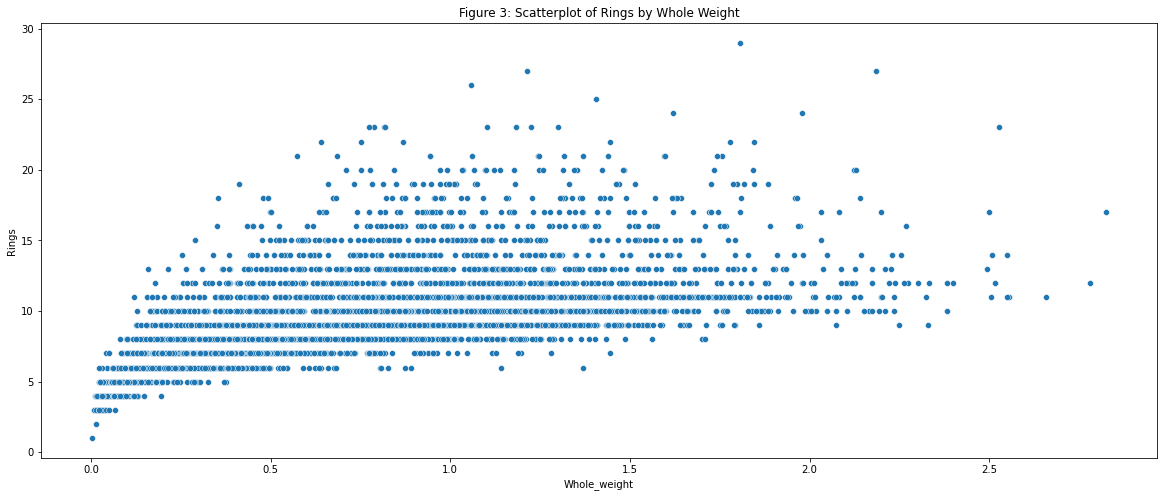

In [17]:
plt.figure(figsize = (20,8))

sns.scatterplot(df['Whole_weight'], df['Rings'])
plt.title('Figure 3: Scatterplot of Rings by Whole Weight');
plt.show();

Just for completeness, the reduced model still violates the assumption that the dependent variables and the dependent variables have a linear relationship, as we can see in the figure above that suggests heteroscedasticity.

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data_reduced = pd.DataFrame()
reduced_data = data_encoded.drop('Length', 1)
vif_data_reduced["feature"] = reduced_data.columns

  
# calculating VIF for each feature
vif_data_reduced["VIF"] = [variance_inflation_factor(reduced_data.values, i) for i in range(len(reduced_data.columns))]
 
print(vif_data_reduced)

          feature         VIF
0        Diameter    8.584861
1          Height    3.619794
2    Whole_weight  113.789454
3  Shucked_weight   32.407766
4  Viscera_weight   17.571075
5    Shell_weight   21.551086
6           Rings    2.163927
7        Gender_F   21.566340
8        Gender_I   17.578128
9        Gender_M   23.977415


In the reduced model we can see that the VIF has been reduced in certain values (diameter and height), but there is still high levels of multicollinearity in our model. This is a violation of the assumption that the independent variables are not highly correlated with each other.

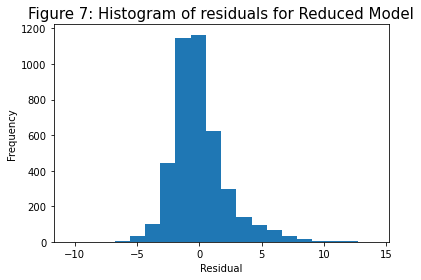

In [19]:
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 7: Histogram of residuals for Reduced Model', fontsize=15);
plt.show();

Similar too our full model the histogram of residuals for the reduced model is right-skewed, and is mostly symmetrical. This shows that the assumption of normality hasn't been violated.

## Critique & Limitations

One of our model's weaknesses is that there is strong multicollinearity problems with our data, this mainly due to how some of our independent variables are strongly linked together. For example, abalones that have a longer length are going to have a longer height and a wider diameter, similarly abalones with a heavier whole weight are going to have a heavier shucked weight, etc because its shucked weight, viscera weight are included with its whole weight. 
Another limitation with our model is that the dependent variable (Rings) and some independent variable do not have a linear relationship, in some of our figures, we can see that they suggest heteroscedasticity.
One more limitation of our model is that there isn't a constant variance of the residuals, as seen in Figure 1, it also showcases some outliers in the data as well as predicting some abalones to have negative rings.

Other than the violation of the assumption of multiple regression, another weakness of our model is that it has only a R-squared value of 0.537, and the reduced model improves it by an insignificant amount to 0.538. This is too low to be used in any professional manner.

The reduced model doesn't significantly change the performance of our model, as it still contains many of the issues with our full model.

## Summary & Conclusions

### Project Summary

In phase 1 we defined the main objective and goal of our project, which was to find a way to predict the number of rings on an abalone based on its other physical characteristics. This was done to avoid the traditional way of counting rings on an abalone because it is an incredibly boring and tedious process. We started off with some really quick data cleaning and preprocessing. This process was incredibly simple and quick because the dataset we used was already clean, we just removed two observations with a height of 0. Later we explored and visualised the data with some graphs, we did 3 types of graphs, univariate, two-variable and three-variable. At the end of phase 1 we found there to be a positive correlation between the dependent variable (Rings) and the independent variables.

In phase 2 of our report we used multiple regression to predict the number of rings on an abalone. We created a model to see our R-squared value, later we did some diagnostic checks with our full model. We found out that our full model violated multiple assumption of multiple regression. To try and improve our model we performed backwards feature selection on our model and removed one variable. This didn't do much to improve the performance of our model as it still contains multiple issues.

### Summary of Findings
In the end we have found through our report that the is a correlation between our dependent variable and our independent variables. Our model is able to predict the number of rings of abalones in the 5-10 ring range with decent accuracy, however the performance of our model is much worse with higher rings. It is also difficult to exactly pinpoint an independent variable that contributes the most to predicting the number of rings on an abalone because our independent variables are highly correlated with each other.

### Conclusions
Our goal going in to this project is to find a way to predict the number of rings on an abalone to avoid the boring and tedious way of counting them by hand. Our method of prediction was multiple linear regression. However, in the end the performance of our model wasn't good enough for any real world usage of it to actually predict the number of rings. We have a R-squared value of 0.5379 but we violated multiple assumption of multiple regression.